## Legacy survey DR10 sky cutouts

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from astropy.cosmology import Planck18 as cosmo
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np 

In [4]:
eroextra_catalog = 'data/catalog/eroextra_final.fits'

df = fits.open(eroextra_catalog)
data = df[1].data

names = data['ERO_NAME']
ero_ra = data['ERO_RA']
ero_dec = data['ERO_DEC']
ero_poserr = data['ERO_POSERR']
ls10_ra = data['LS10_RA']
ls10_dec = data['LS10_DEC']
z = data['Z_REDSHIFT']

layer = 'ls-dr10'
pixscale = 0.262  # arcseconds per pixel
size = 100  # pixels

200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220


/var/folders/z7/hlfpdvwd3k74cd0h51_hnbzr0000gn/T/ipykernel_17333/299221626.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303


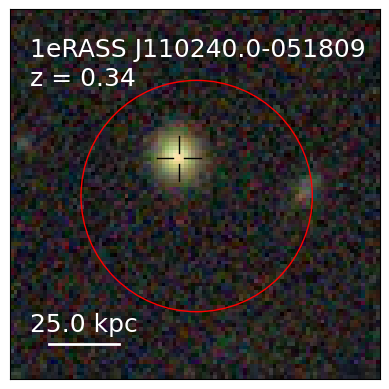

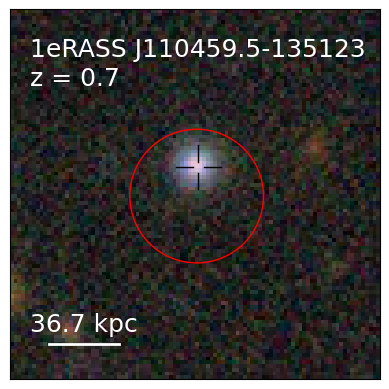

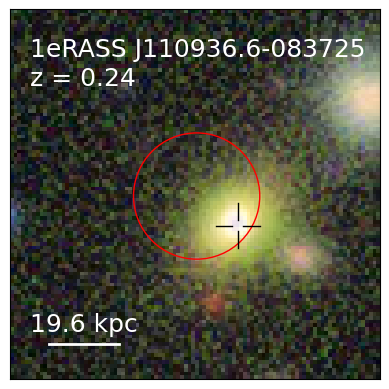

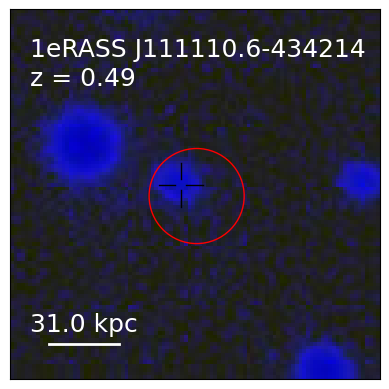

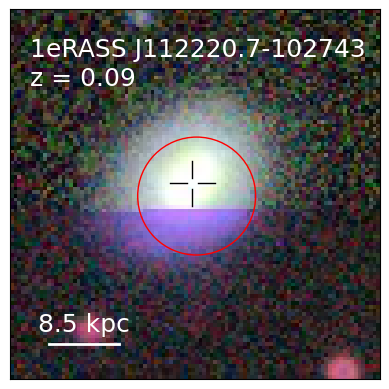

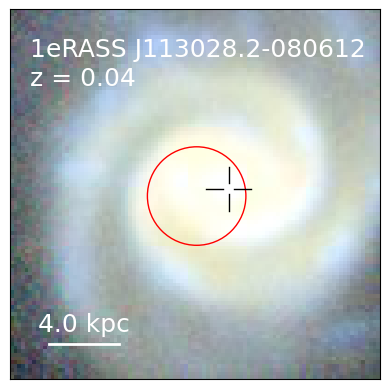

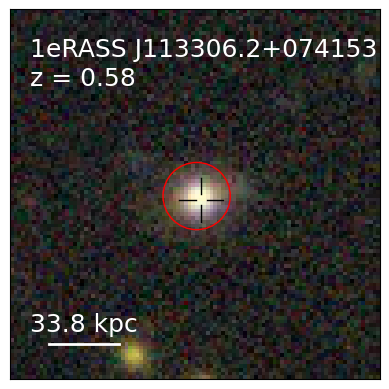

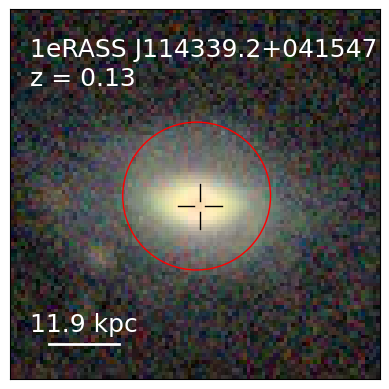

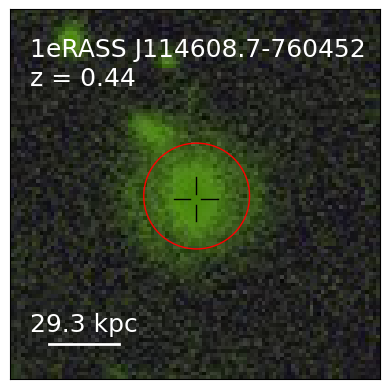

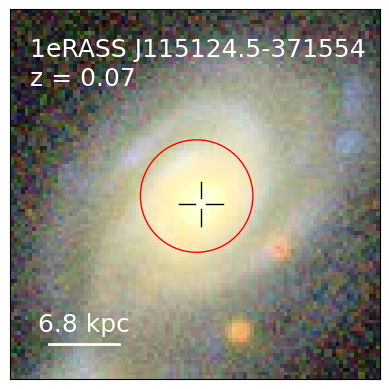

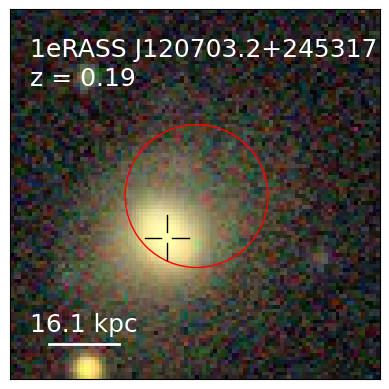

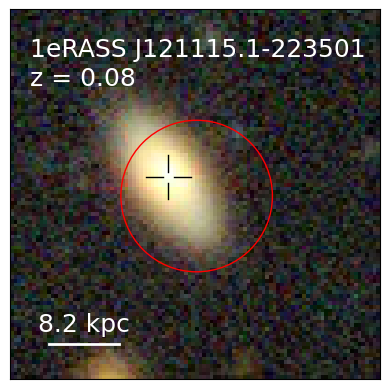

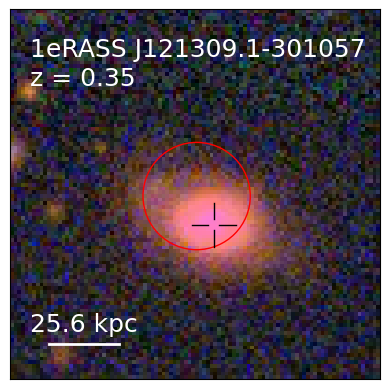

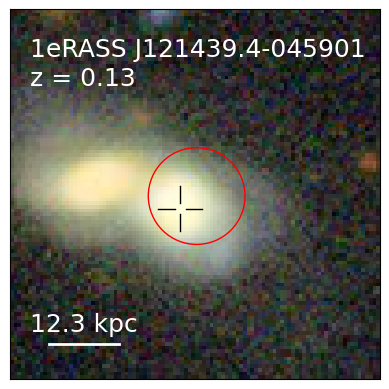

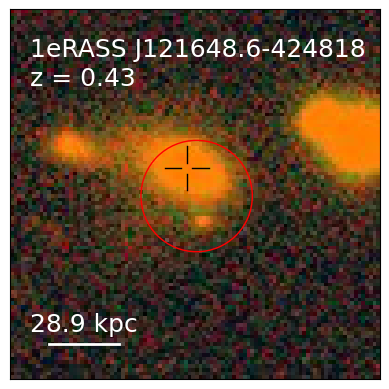

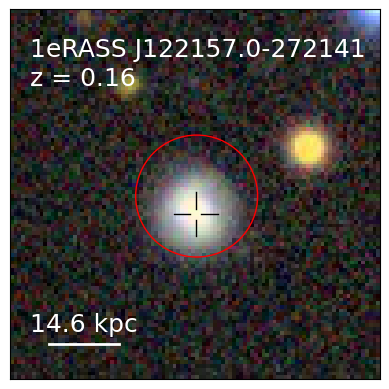

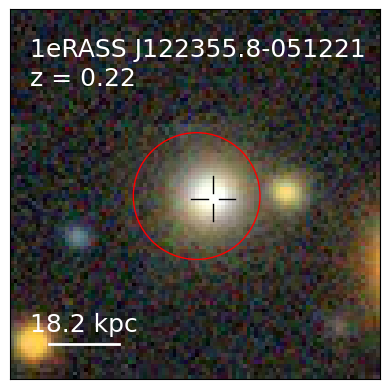

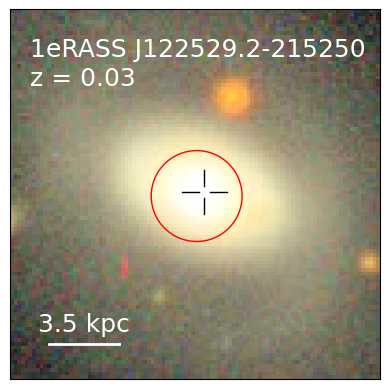

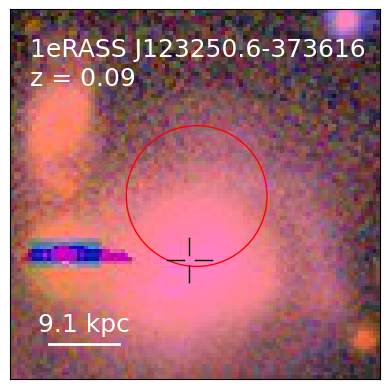

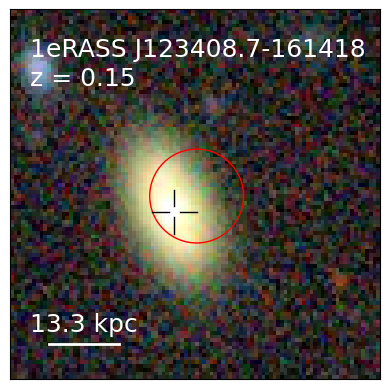

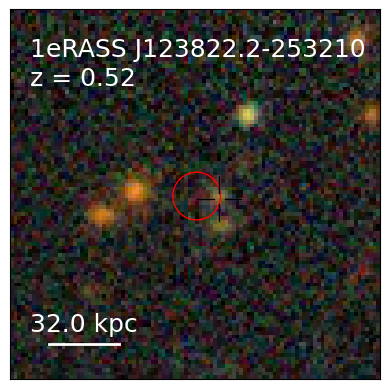

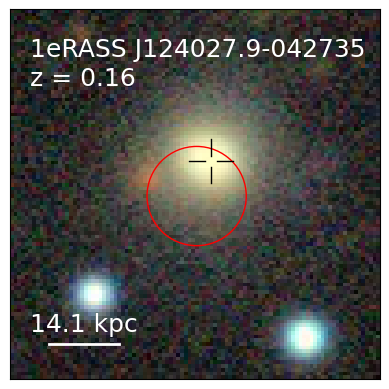

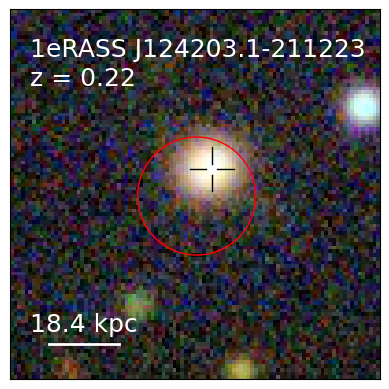

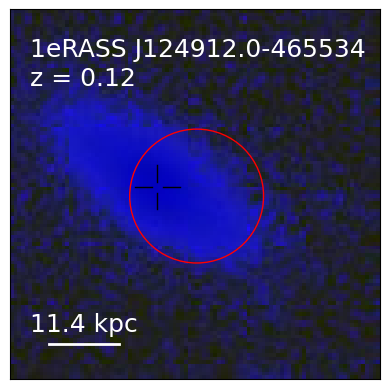

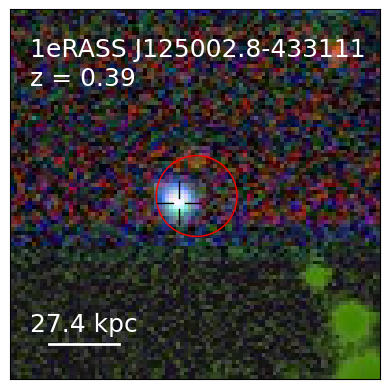

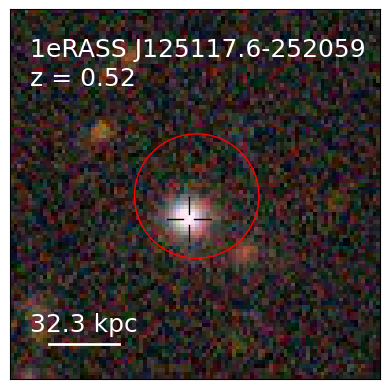

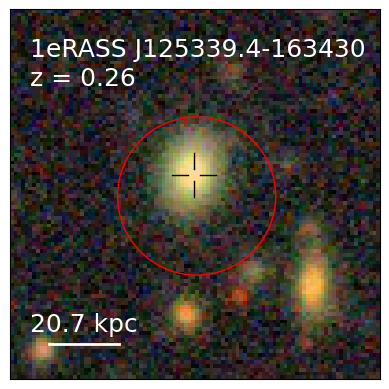

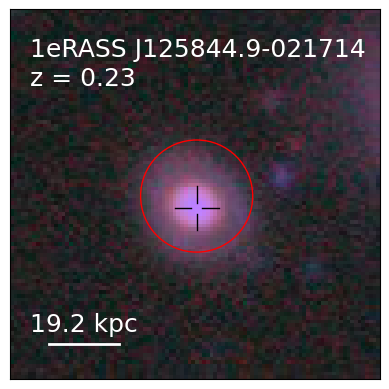

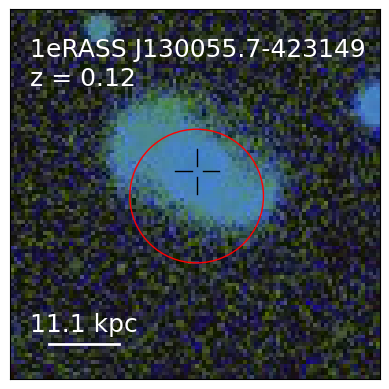

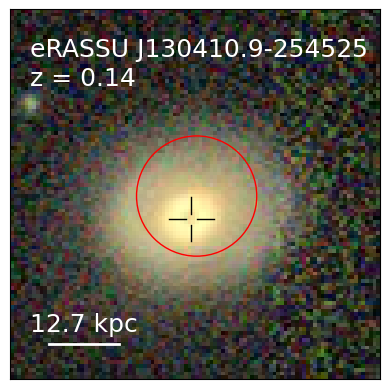

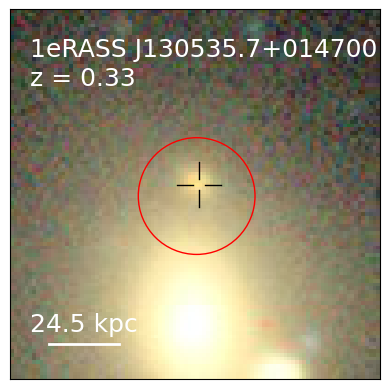

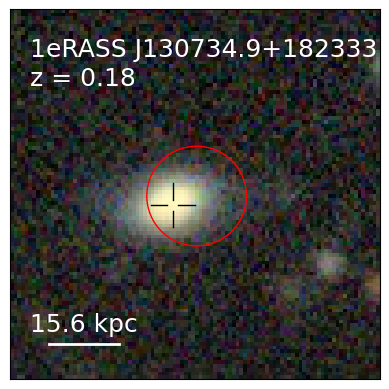

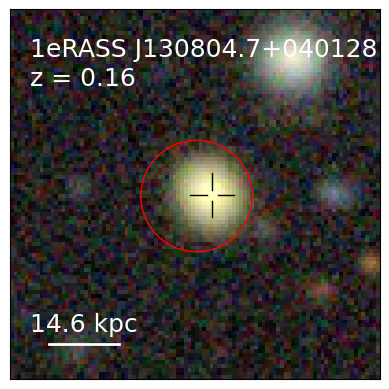

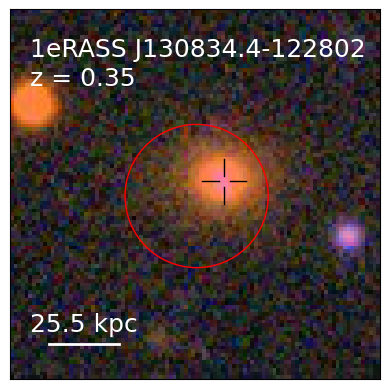

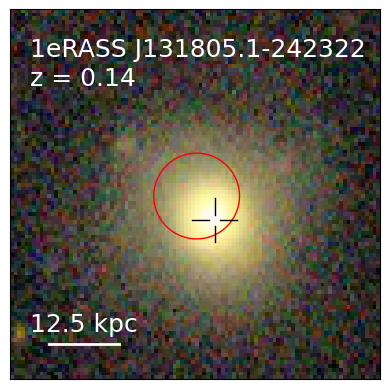

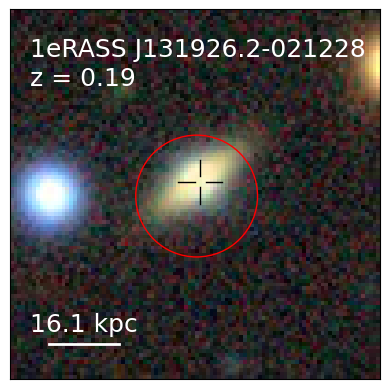

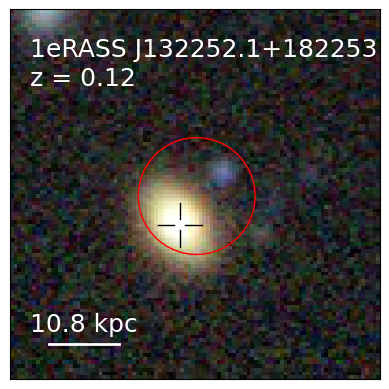

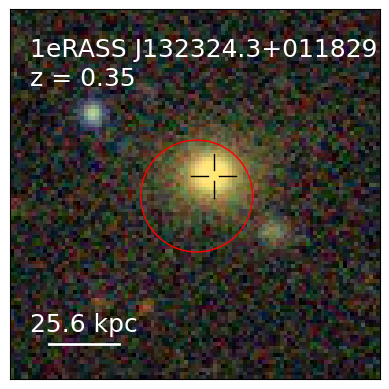

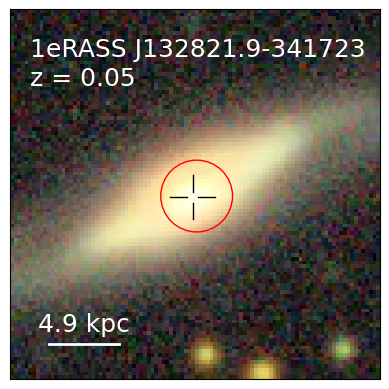

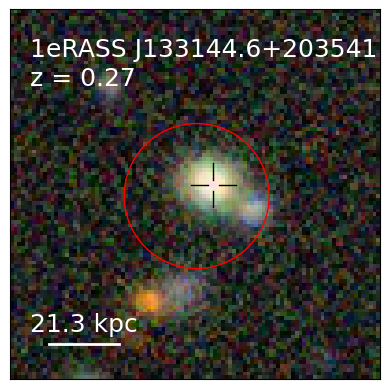

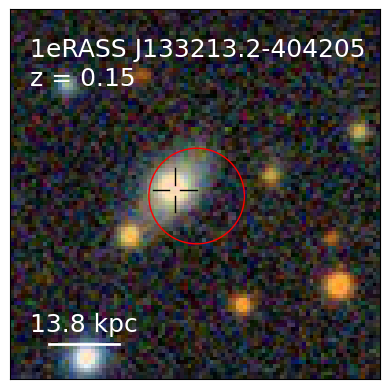

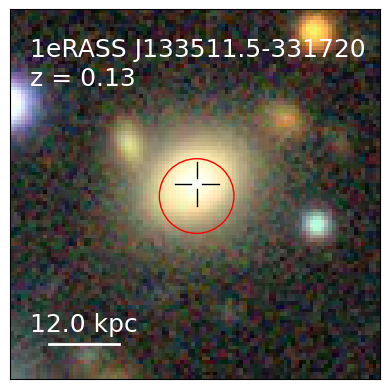

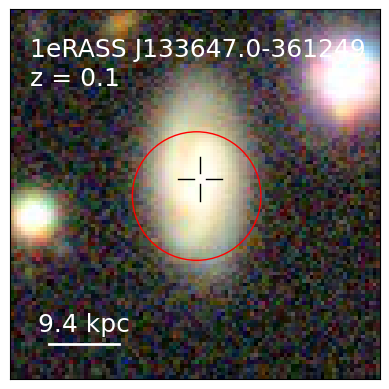

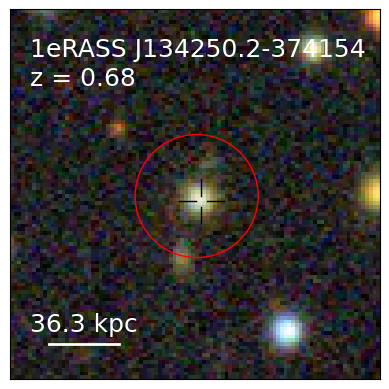

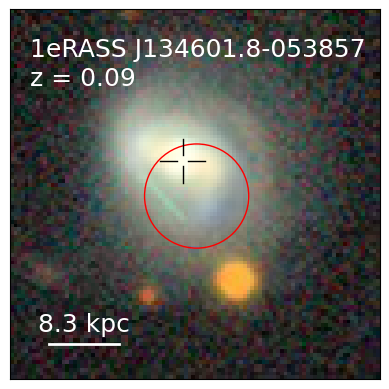

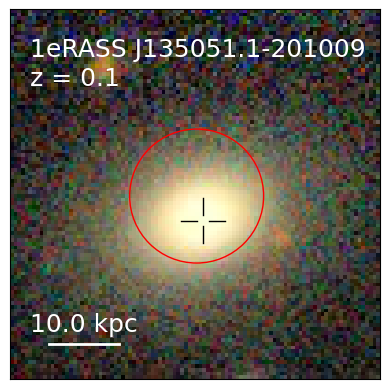

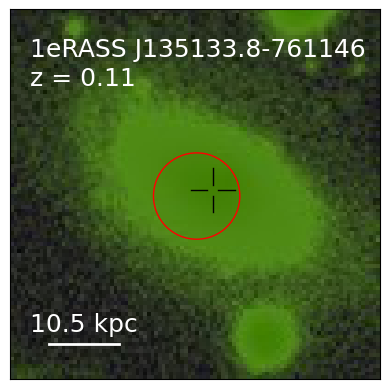

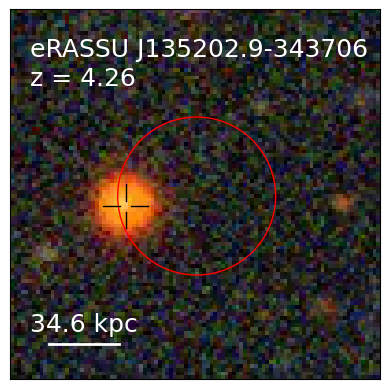

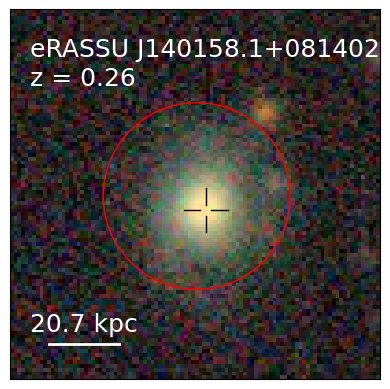

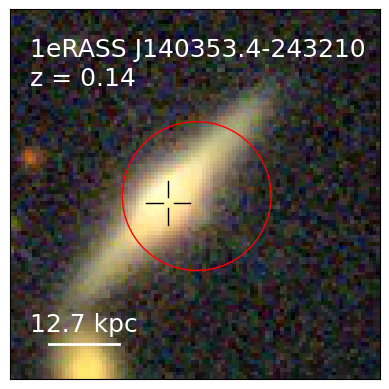

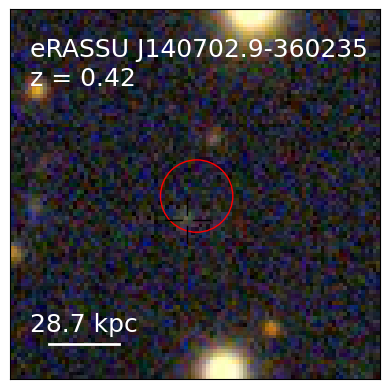

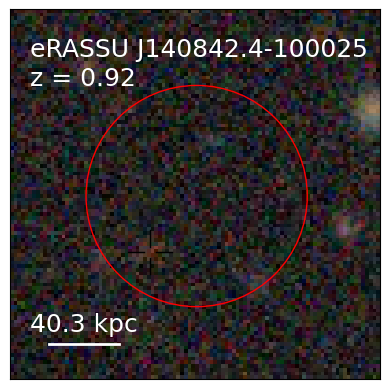

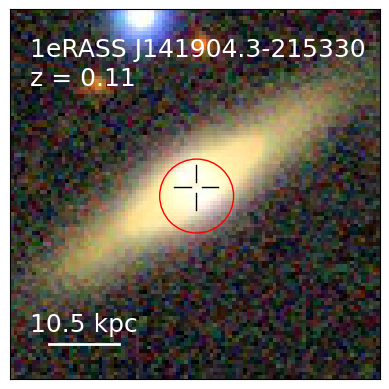

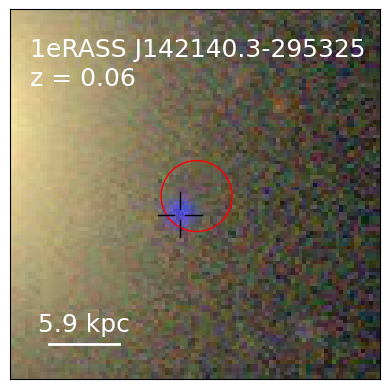

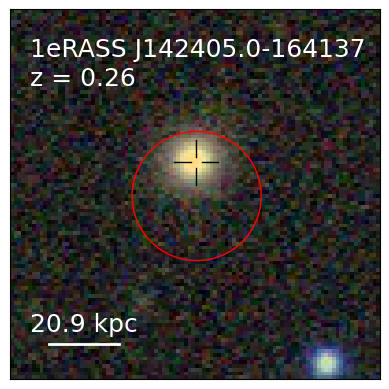

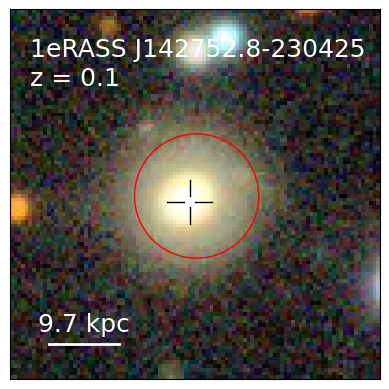

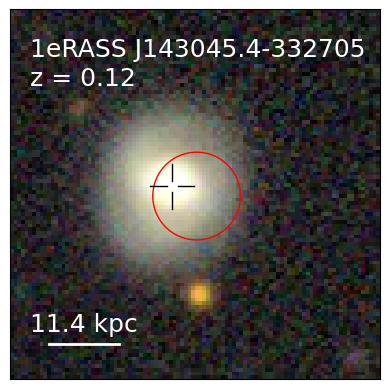

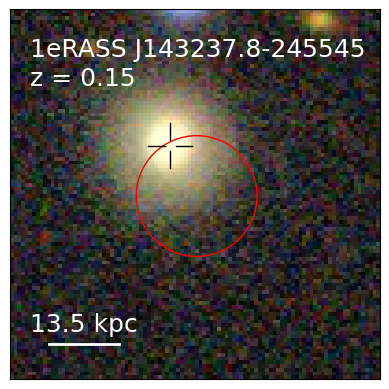

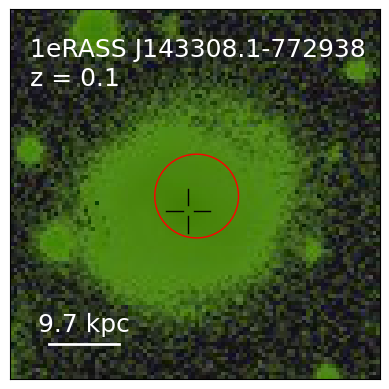

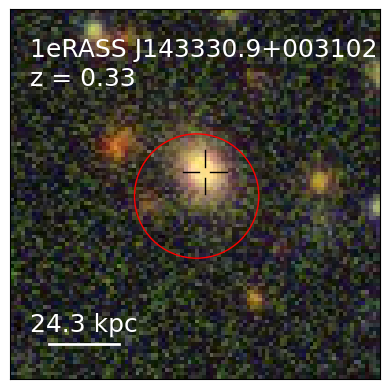

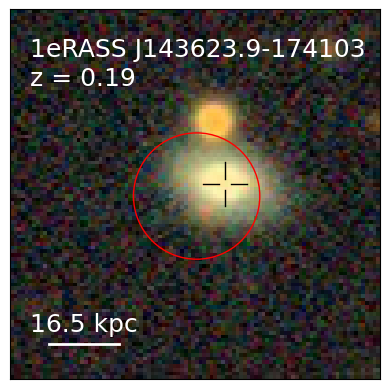

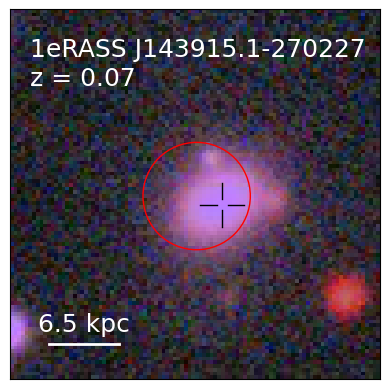

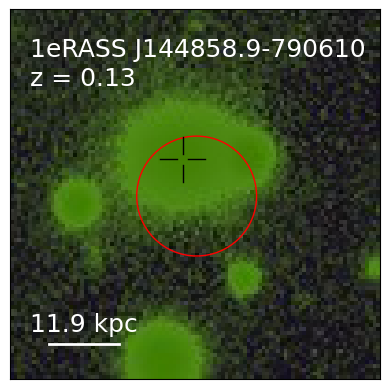

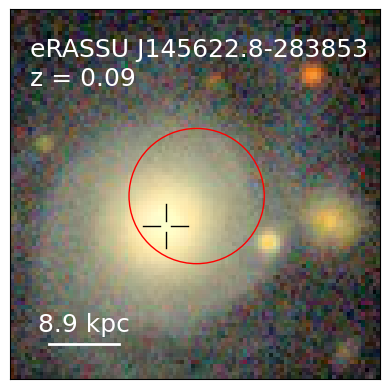

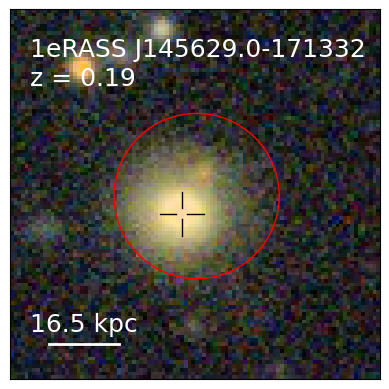

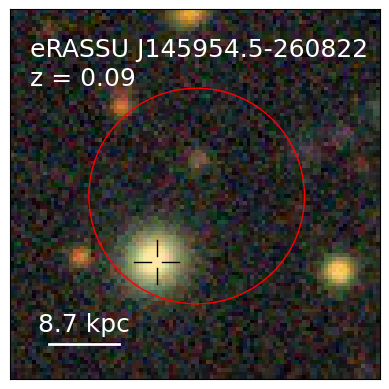

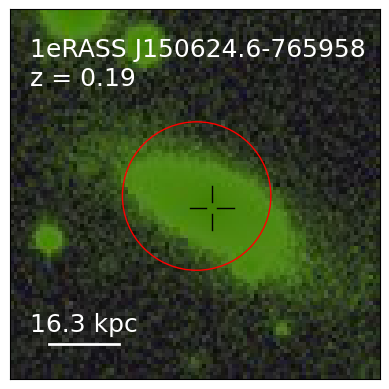

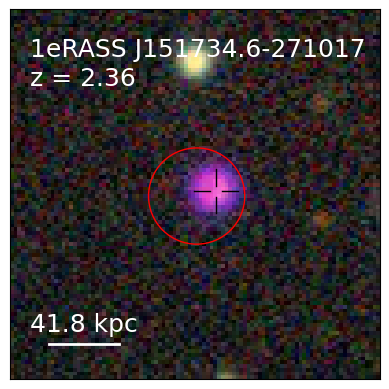

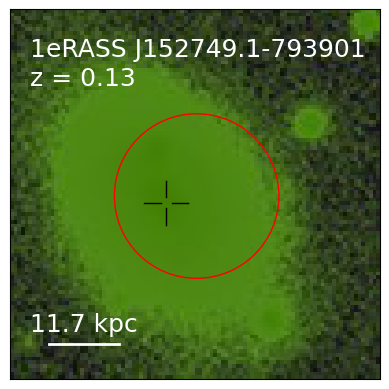

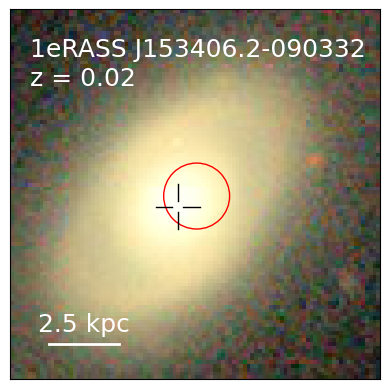

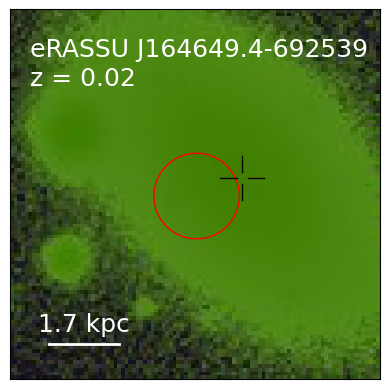

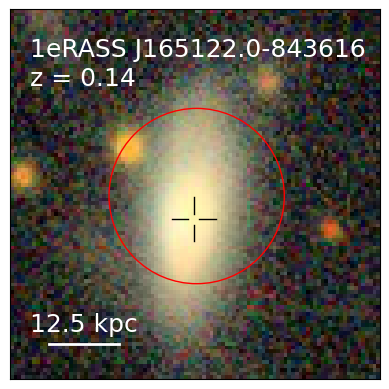

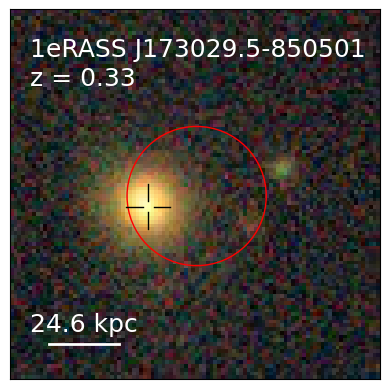

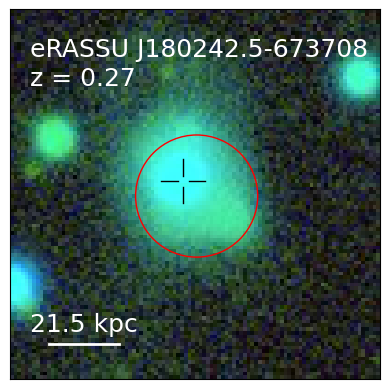

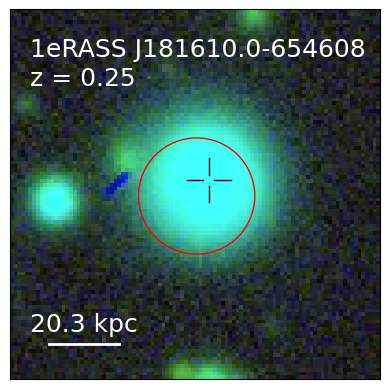

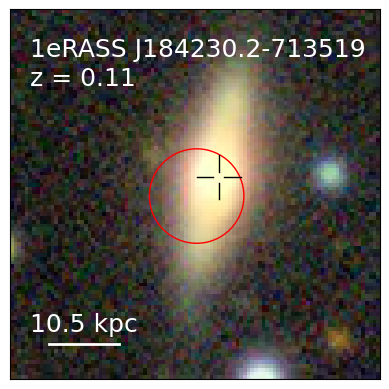

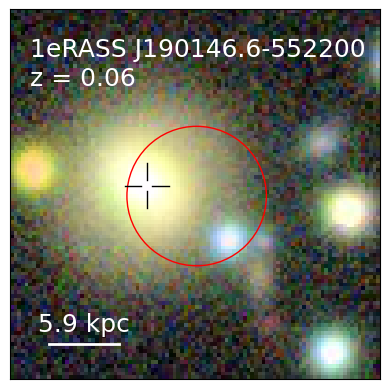

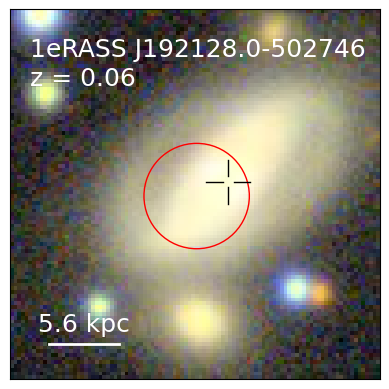

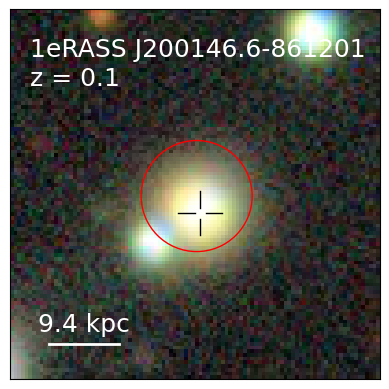

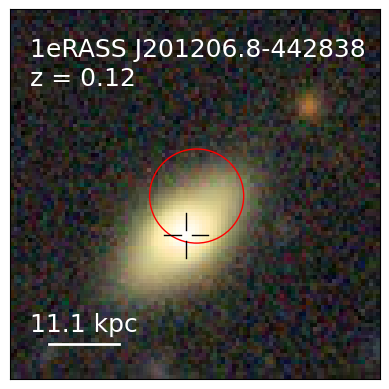

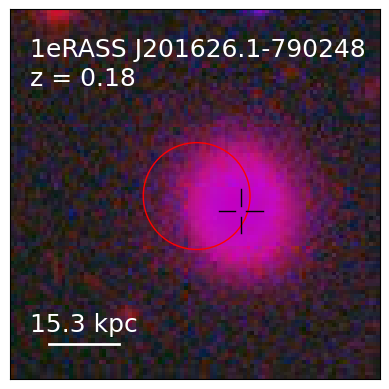

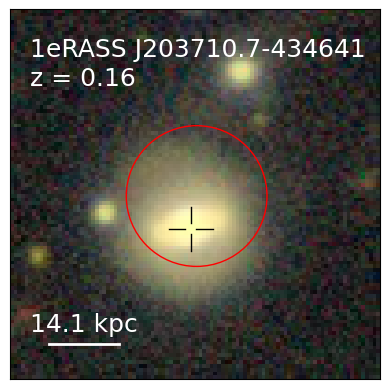

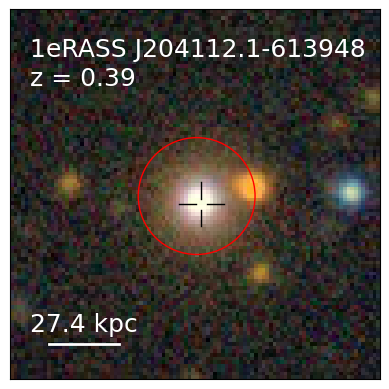

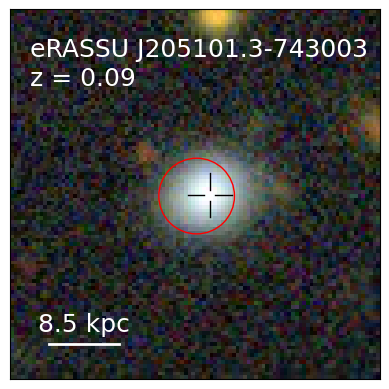

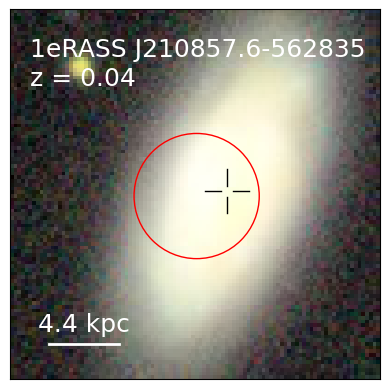

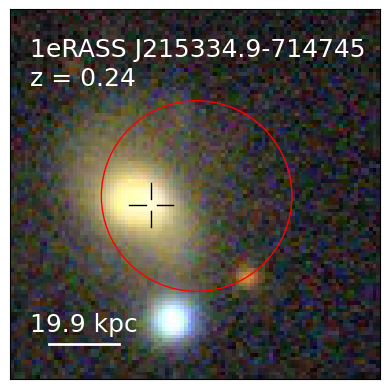

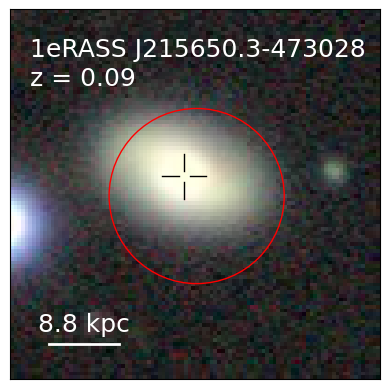

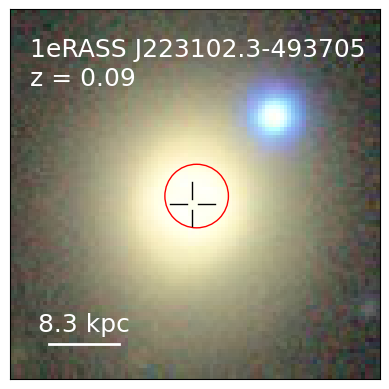

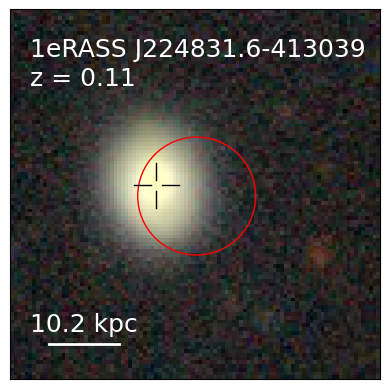

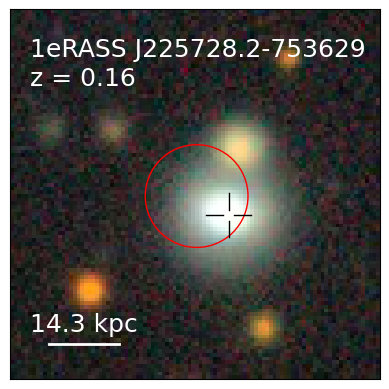

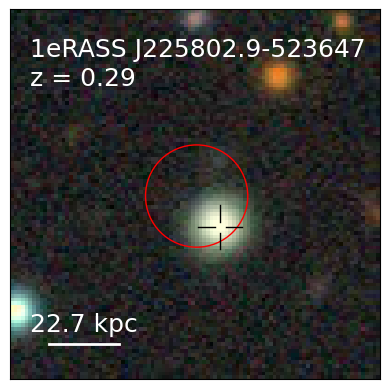

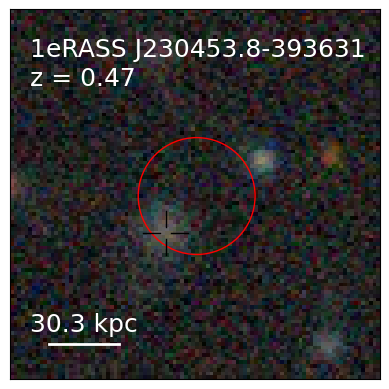

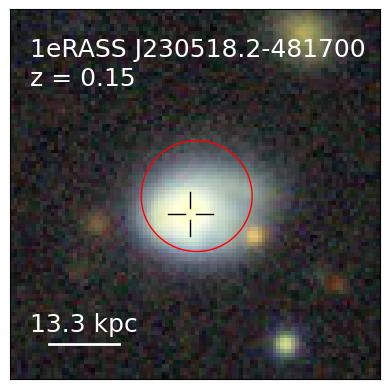

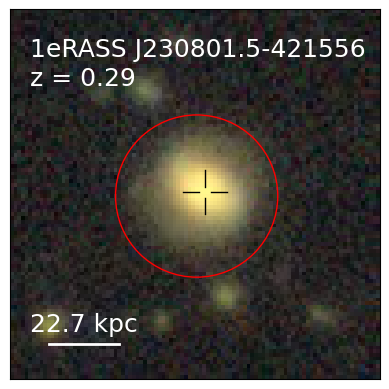

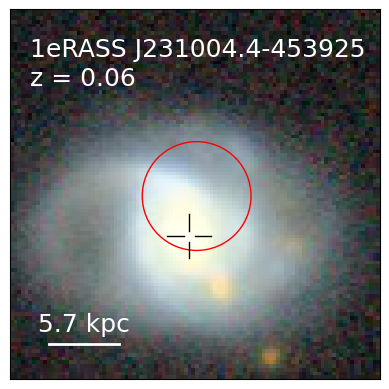

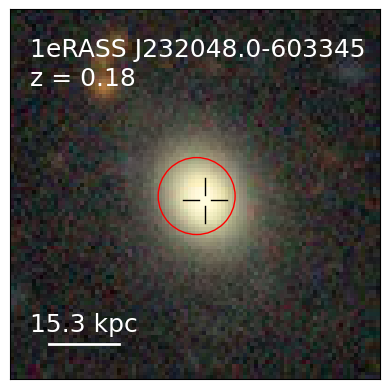

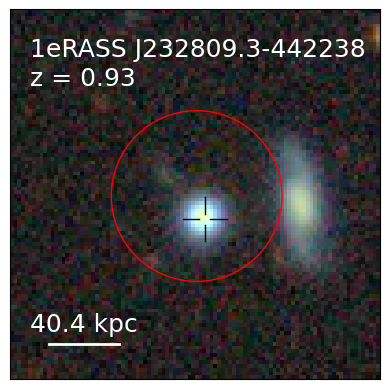

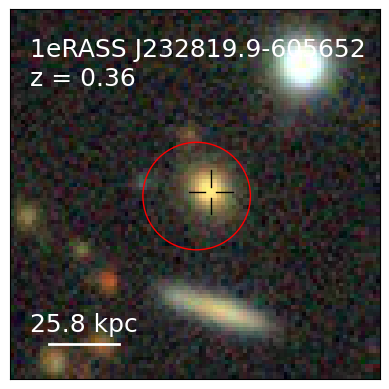

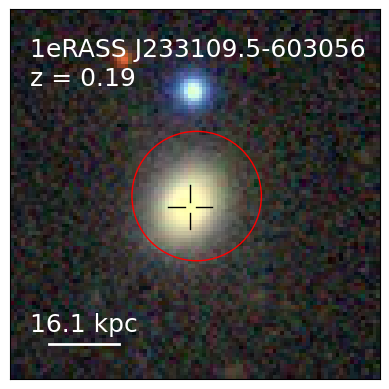

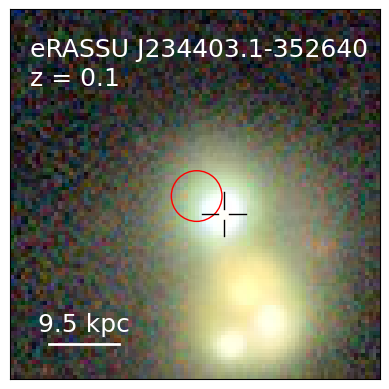

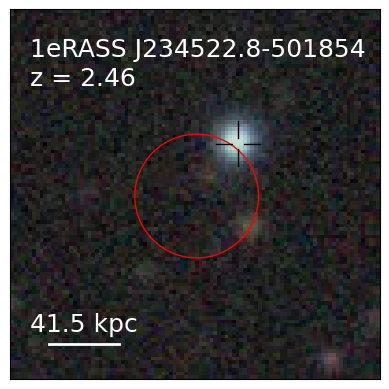

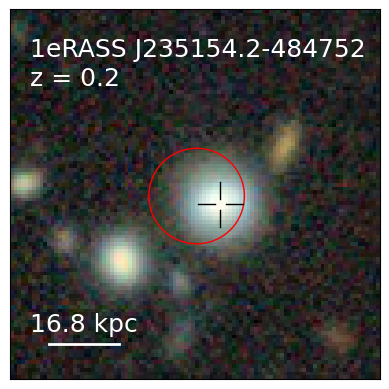

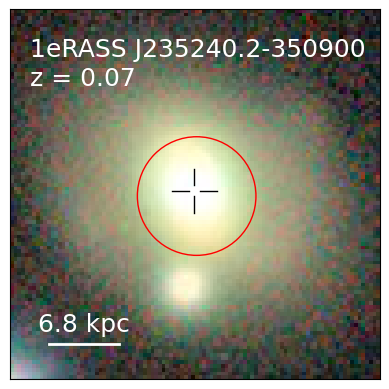

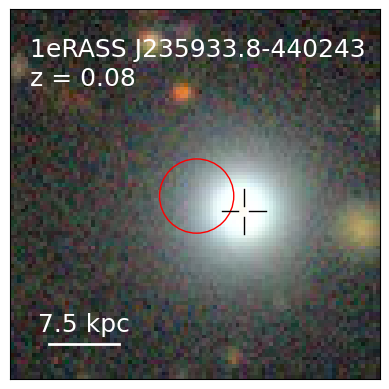

In [8]:
for i in range(len(names)):
  #if (i>=200):
    
    print(i)
    
    # Construct the URL, based on the center coordinates (in our case the X-ray position of the source)
    url = f'http://legacysurvey.org/viewer/cutout.jpg?ra={ero_ra[i]}&dec={ero_dec[i]}&layer={layer}&pixscale={pixscale}&size={size}'

    # Download the image
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))

    # Calculate the scale in kpc per arcsecond
    kpc_per_arcsec = cosmo.kpc_proper_per_arcmin(z[i]).value / 60  # Convert from kpc/arcmin to kpc/arcsec
    
    
    # Display the image
    fig, ax = plt.subplots()
    ax.imshow(image)

    # Define the center and radius of the circle
    center_ra = ero_ra[i]  
    center_dec = ero_dec[i]  
    radius_arcsec = ero_poserr[i]*3  #in arcseconds?
    
    # Convert RA/Dec to pixel coordinates
    center_x = size / 2
    center_y = size / 2
    radius_pixels = radius_arcsec / pixscale

    # Create a circle patch
    circle = patches.Circle((center_x, center_y), radius_pixels, edgecolor='red', facecolor='none')

    # Add the circle to the plot
    ax.add_patch(circle)

    # Remove x and y axis numbers
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    # Add a scale bar in kpc
    scale_length_arcsec = 5  # Length of the scale bar in arcseconds
    scale_length_pixels = scale_length_arcsec / pixscale
    scale_length_kpc = scale_length_arcsec * kpc_per_arcsec

    # Draw the scale bar as a white line
    scale_bar = Line2D([10, 10 + scale_length_pixels], [size - 10, size - 10],
                   color='white', linewidth=2)
    ax.add_line(scale_bar)
    ax.text(10 + scale_length_pixels / 2, size - 12, f'{scale_length_kpc:.1f} kpc',
        color='white', ha='center', va='bottom',fontsize=18)

    
    
    #Add a cross at another coordinate pair (in our case the optical position of the source)
    delta_ra_deg = ls10_ra[i] - ero_ra[i]
    delta_dec_deg = ls10_dec[i] - ero_dec[i]

    # Convert RA and Dec differences to pixel distances
    # RA difference in pixels (multiply by cos(dec) to account for projection)
    delta_ra_pixels = delta_ra_deg * 3600 / pixscale * np.cos(np.radians(ero_dec[i]))
    delta_dec_pixels = delta_dec_deg * 3600 / pixscale

    # Calculate the pixel coordinates of the second cross
    ls10_center_x = center_x - delta_ra_pixels
    ls10_center_y = center_y - delta_dec_pixels
    
    
    # Add a small cross at the center of the circle
    cross_size = 6  # Size of the cross in pixels
    cross_color = 'k'

    # Horizontal line of the cross with no center
    hline = Line2D([ls10_center_x - cross_size, ls10_center_x - 1.5], [ls10_center_y, ls10_center_y],
               color=cross_color, linewidth=1)
    hline2 = Line2D([ls10_center_x + 1.5, ls10_center_x + cross_size], [ls10_center_y, ls10_center_y],
               color=cross_color, linewidth=1)

    # Vertical line of the cross with no center
    vline = Line2D([ls10_center_x, ls10_center_x], [ls10_center_y - cross_size, ls10_center_y - 1.5],
               color=cross_color, linewidth=1)
    vline2 = Line2D([ls10_center_x, ls10_center_x], [ls10_center_y + 1.5, ls10_center_y + cross_size],
               color=cross_color, linewidth=1)

    # Add the lines to the plot
    ax.add_line(hline)
    ax.add_line(hline2)
    ax.add_line(vline)
    ax.add_line(vline2)

    # Add the source name in the top left corner
    ax.text(5, 7, names[i], color='white', ha='left', va='top', fontsize=18)
    ax.text(5, 15, 'z = ' + str(round(z[i],2)), color='white', ha='left', va='top', fontsize=18)
    #ax.text(5, 23, 'i-band only', color='white', ha='left', va='top', fontsize=18)


    plt.savefig('data/galaxy_ls10_images/'+names[i]+'_ls10.jpeg',bbox_inches='tight', pad_inches=0)
    #sys.exit()